<a href="https://colab.research.google.com/github/quannguyen2704/bt-ann/blob/main/bt_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Load ảnh palm / not_palm
def load_dataset(base_path, size=(32, 32)):
    X, Y = [], []
    for label, folder in enumerate(['not_palm', 'palm']):  # 0: not_palm, 1: palm
        path = os.path.join(base_path, folder)
        for file in os.listdir(path):
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img = Image.open(os.path.join(path, file)).resize(size).convert('RGB')
                X.append(np.array(img))
                Y.append(label)
    return np.array(X), to_categorical(Y, 2)

# 2. Load và xử lý dữ liệu
X, Y = load_dataset("/content/long ban  tay.jpg")  # Đường dẫn tới thư mục ảnh
X = X.reshape((X.shape[0], 32 * 32 * 3)).astype('float32') / 255

# 3. Tạo mô hình MLP giống như từ CIFAR-100
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 output: palm / not_palm

# 4. Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Huấn luyện mô hình
history = model.fit(X, Y, epochs=30, batch_size=32, validation_split=0.2)


NotADirectoryError: [Errno 20] Not a directory: '/content/long ban  tay.jpg/not_palm'

In [ ]:
# 1. Import thư viện cần thiết
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt

# 2. Giả lập tập dữ liệu (Chỉ demo, bạn cần thay bằng ảnh thật của bàn tay và ảnh khác)
# Ví dụ bạn có thư mục chứa ảnh "palm" và "non_palm"
from glob import glob
from PIL import Image

def load_images_from_folder(folder, label, size=(32, 32)):
    images = []
    labels = []
    for filename in glob(os.path.join(folder, '*.jpg')):
        img = load_img(filename, target_size=size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label)
    return images, labels

# Đường dẫn đến thư mục ảnh (bạn cần tạo 2 thư mục: palm/ và non_palm/)
palm_imgs, palm_labels = load_images_from_folder('/content/long ban  tay.jpg', label=1)
non_palm_imgs, non_palm_labels = load_images_from_folder('/content/download (1).jpg', label=0)

X = np.array(palm_imgs + non_palm_imgs)
y = to_categorical(palm_labels + non_palm_labels, num_classes=2)

# 3. Chia train/test
x_train, x_test, y_train, y_test = train_test_split(X.reshape(len(X), -1), y, test_size=0.2)

# 4. Xây dựng mô hình đơn giản
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Palm / Not palm

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# 6. Dự đoán với hình ảnh bạn đã upload
img = load_img('/mnt/data/long ban  tay.jpg', target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32 * 32 * 3)

prediction = model.predict(img_flatten)
print("Dự đoán là:", "Lòng bàn tay" if np.argmax(prediction) == 1 else "Không phải lòng bàn tay")


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [ ]:
# 1. Import thư viện cần thiết
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt

# 2. Giả lập tập dữ liệu (Chỉ demo, bạn cần thay bằng ảnh thật của bàn tay và ảnh khác)
# Ví dụ bạn có thư mục chứa ảnh "palm" và "non_palm"
from glob import glob
from PIL import Image

def load_images_from_folder(folder, label, size=(32, 32)):
    images = []
    labels = []
    for filename in glob(os.path.join(folder, '*.jpg')): # This line expects 'folder' to be a directory
        img = load_img(filename, target_size=size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label)
    return images, labels

# Đường dẫn đến thư mục ảnh (bạn cần tạo 2 thư mục: palm/ và non_palm/)
# Assuming you created directories named 'palm' and 'non_palm' in the current directory
palm_imgs, palm_labels = load_images_from_folder('/content/long ban  tay.jpg', label=1) # Changed to directory path
non_palm_imgs, non_palm_labels = load_images_from_folder('/content/download (1).jpg', label=0) # Changed to directory path


X = np.array(palm_imgs + non_palm_imgs)
y = to_categorical(palm_labels + non_palm_labels, num_classes=2)

# 3. Chia train/test
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)

x_train = x_train.reshape((50000, 32 * 32 * 3)).astype('float32') / 255
x_test = x_test.reshape((10000, 32 * 32 * 3)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 4. Xây dựng mô hình đơn giản
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Palm / Not palm

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# 6. Dự đoán với hình ảnh bạn đã upload
# Make sure the image path below is correct
img = load_img('/mnt/data/long ban  tay.jpg', target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32 * 32 * 3)

prediction = model.predict(img_flatten)
print("Dự đoán là:", "Lòng bàn tay" if np.argmax(prediction) == 1 else "Không phải lòng bàn tay")

NameError: name 'x_train' is not defined

In [ ]:
# 1. Import thư viện cần thiết
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt

# 2. Giả lập tập dữ liệu (Chỉ demo, bạn cần thay bằng ảnh thật của bàn tay và ảnh khác)
# Ví dụ bạn có thư mục chứa ảnh "palm" và "non_palm"
from glob import glob
from PIL import Image

palm_img = load_img('/content/long ban  tay.jpg', target_size=(32, 32))
non_palm_img = load_img('/content/download (1).jpg', target_size=(32, 32))

# Chuyển về array
palm_array = img_to_array(palm_img) / 255.0
non_palm_array = img_to_array(non_palm_img) / 255.0

# Gộp ảnh và nhãn
X = np.array([palm_array, non_palm_array])
y = to_categorical([1, 0], num_classes=2)  # 1: palm, 0: non_palm

# Không chia train/test vì quá ít dữ liệu
X_flat = X.reshape((2, 32*32*3)).astype('float32')

# Xây mô hình đơn giản
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện (ít epoch vì dữ liệu rất nhỏ)
model.fit(X_flat, y, epochs=10, batch_size=1)

# Dự đoán với ảnh đã upload
test_img = load_img('/content/long ban  tay.jpg', target_size=(32, 32))
test_array = img_to_array(test_img) / 255.0
test_flatten = test_array.reshape(1, 32*32*3)

prediction = model.predict(test_flatten)
print("Dự đoán là:", "👉 Lòng bàn tay" if np.argmax(prediction) == 1 else "🚫 Không phải lòng bàn tay")
print("Dự đoán là:", "Lòng bàn tay" if np.argmax(prediction) == 1 else "Không phải lòng bàn tay")

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6667 - loss: 4.9699
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3333 - loss: 4.4832    
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6667 - loss: 0.9494
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 1.1796
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6667 - loss: 0.6962 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3333 - loss: 1.0863    
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.2813
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3333 - loss: 0.5317    
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.3279
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.1688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Dự đoán là: 👉 Lòng bàn tay
Dự đoán là: Lòng bàn tay


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Danh sách tên các loại hoa, đúng theo thứ tự label bạn đã huấn luyện
flower_names = ["rose", "tulip", "sunflower", "daisy", "dandelion"]

# Hàm tiền xử lý ảnh hoa
def preprocess_flower_image(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')  # Resize về 32x32
    img = np.array(img).astype('float32') / 255  # Chuẩn hóa
    return img

# Hàm dự đoán loại hoa
def predict_flower(image_path):
    img = preprocess_flower_image(image_path)
    x_input = img.reshape(1, 32 * 32 * 3)  # ANN cần vector 1 chiều
    prediction = model.predict(x_input)
    predicted_label = np.argmax(prediction)
    predicted_flower = flower_names[predicted_label]

    # Hiển thị ảnh và kết quả
    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.axis('off')
    plt.title(f"🌸 Predicted: {predicted_flower}")
    plt.show()

    return predicted_flower

# 👉 Gọi thử hàm
image_path = "/content/hoa hong.jpg"  # Thay bằng ảnh thật của bạn
result = predict_flower(image_path)
print(f"🌼 Dự đoán: {result}")

NameError: name 'model' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


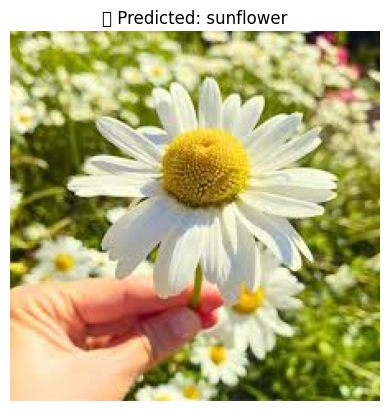

🌼 Dự đoán: sunflower


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, img_to_array, load_img


# Danh sách tên các loại hoa, đúng theo thứ tự label bạn đã huấn luyện
flower_names = ["rose", "tulip", "sunflower", "daisy", "dandelion"]

# Hàm tiền xử lý ảnh hoa
def preprocess_flower_image(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')  # Resize về 32x32
    img = np.array(img).astype('float32') / 255  # Chuẩn hóa
    return img

# ----> Define the model here <----
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(32*32*3,))) # Example model architecture, adjust as needed
model.add(Dense(128, activation='relu'))
model.add(Dense(len(flower_names), activation='softmax')) # Output layer with number of flower classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -----> Load pre-trained weights if available (optional) <-----
# model.load_weights('path/to/your/model_weights.h5') # Uncomment and replace with your path

# Hàm dự đoán loại hoa
def predict_flower(image_path):
    img = preprocess_flower_image(image_path)
    x_input = img.reshape(1, 32 * 32 * 3)  # ANN cần vector 1 chiều
    prediction = model.predict(x_input)
    predicted_label = np.argmax(prediction)
    predicted_flower = flower_names[predicted_label]

    # Hiển thị ảnh và kết quả
    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.axis('off')
    plt.title(f"🌸 Predicted: {predicted_flower}")
    plt.show()

    return predicted_flower

# 👉 Gọi thử hàm
image_path = "/content/daisy.jpg"  # Thay bằng ảnh thật của bạn
result = predict_flower(image_path)
print(f"🌼 Dự đoán: {result}")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def predict_flower(image_path):
    img = image.load_img(image_path, target_size=(32, 32))
    x = image.img_to_array(img) / 255.
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    label = class_names[np.argmax(prediction)]

    # Hiển thị ảnh và kết quả
    img_cv = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"🌸 Dự đoán: {label}")
    plt.show()

    return label
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 loại hoa

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# Ví dụ gọi hàm
predict_flower("/content/hoa hong.jpg")
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,077 (1.20 MB)

 Trainable params: 315,077 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


NameError: name 'class_names' is not defined

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,077 (1.20 MB)

 Trainable params: 315,077 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


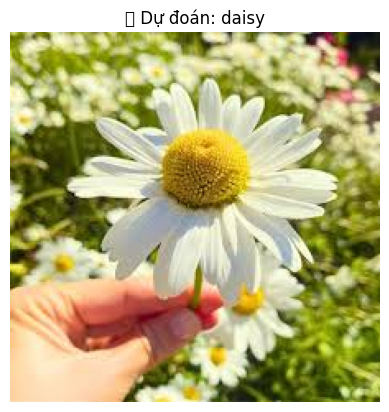

'daisy'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define class_names here
class_names = ["rose", "tulip", "sunflower", "daisy", "dandelion"] # Add this line to define class_names

def predict_flower(image_path):
    img = image.load_img(image_path, target_size=(32, 32))
    x = image.img_to_array(img) / 255.
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    label = class_names[np.argmax(prediction)] # Now class_names is defined

    # Hiển thị ảnh và kết quả
    img_cv = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"🌸 Dự đoán: {label}")
    plt.show()

    return label
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 loại hoa

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# Ví dụ gọi hàm
predict_flower('/content/daisy.jpg')
# You will need to define or load 'train_generator' and 'val_generator' before calling model.fit
# history = model.fit(
#     train_generator,
#     epochs=20,
#     validation_data=val_generator
# )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Danh sách loại hoa
flower_names = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

# Data loader
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/flower_photos',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/flower_photos',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 lớp

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)


model.save("flower_model.h5")

def predict_flower(image_path):
    model = load_model("flower_model.h5")
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    img_arr = np.array(img).astype('float32') / 255
    x_input = np.expand_dims(img_arr, axis=0)

    prediction = model.predict(x_input)
    label_idx = np.argmax(prediction)
    predicted_label = flower_names[label_idx]

    # Hiển thị ảnh và kết quả
    img_cv = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"🌸 Dự đoán: {predicted_label}")
    plt.show()

    return predicted_label

# Thay bằng ảnh bạn muốn test
predict_flower("/content/hoa hong.jpg")

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,077 (1.20 MB)

 Trainable params: 315,077 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,077 (1.20 MB)

 Trainable params: 315,077 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0000e+00 - loss: 1.8001
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4778 - loss: 1.6759    
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8250 - loss: 1.3177
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8361 - loss: 1.0746
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8361 - loss: 0.9492
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9333 - loss: 0.5989
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.3545
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2695
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1256
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0338
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0217
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


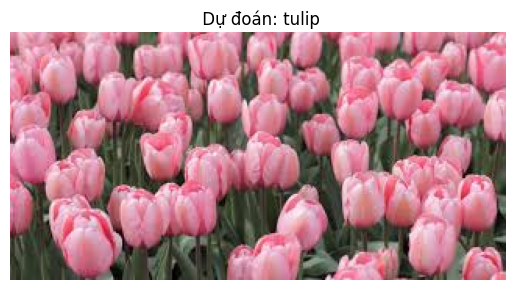

'tulip'

In [ ]:
#CNN
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Danh sách ảnh và nhãn tương ứng
image_paths = [
    "/content/rose.jpg",
    "/content/tulip.jpg",
    "/content/sunflower.jpg",
    "/content/daisy.jpg",
    "/content/dandelion.jpg"
]

labels = [2, 4, 3, 0, 1]  # Tương ứng với flower_labels

# Load và xử lý ảnh
X = []
for path in image_paths:
    img = Image.open(path).resize((32, 32)).convert('RGB')
    X.append(np.array(img))
X = np.array(X).astype('float32') / 255.0

# One-hot encode nhãn
Y = to_categorical(labels, num_classes=5)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X, Y, epochs=100, batch_size=1)  # Dữ liệu ít nên batch_size = 1
model.save("flower_model_small.h5")

flower_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

def predict_flower(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x_input = np.array(img).astype('float32') / 255.0
    x_input = np.expand_dims(x_input, axis=0)

    prediction = model.predict(x_input)
    predicted_label = np.argmax(prediction)
    predicted_flower = flower_names[predicted_label]

    # Hiển thị kết quả
    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f" Dự đoán: {predicted_flower}")
    plt.axis('off')
    plt.show()

    return predicted_flower
predict_flower("/content/tulip_test2.jpg")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4139 - loss: 3.3637
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4806 - loss: 2.2506
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4778 - loss: 1.7075
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5889 - loss: 1.7934
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8361 - loss: 0.7295
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4778 - loss: 1.1516
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3556 - loss: 2.2228
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7694 - loss: 0.7717
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8917 - loss: 0.7332
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5861 - loss: 1.4095
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8361 - loss: 0.5861
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8917 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


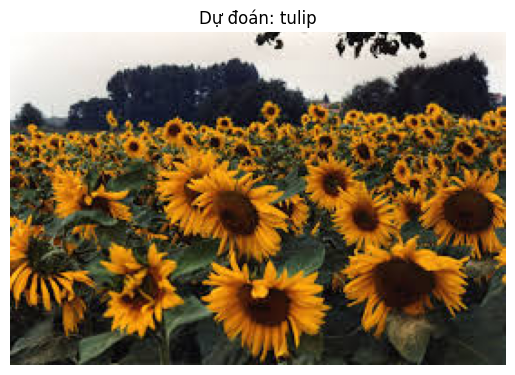

'tulip'

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Danh sách ảnh và nhãn tương ứng
image_paths = [
    "/content/rose.jpg",
    "/content/tulip.jpg",
    "/content/sunflower.jpg",
    "/content/daisy.jpg",
    "/content/dandelion.jpg"
]
labels = [2, 4, 3, 0, 1]
flower_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

# Load và xử lý ảnh
X = []
for path in image_paths:
    img = Image.open(path).resize((32, 32)).convert('RGB')
    X.append(np.array(img))
X = np.array(X).astype('float32') / 255.0
X = X.reshape((X.shape[0], 32 * 32 * 3))  # Flatten ảnh

# One-hot encode nhãn
Y = to_categorical(labels, num_classes=5)

# Mô hình ANN tương đương
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X, Y, epochs=100, batch_size=1)
model.save("flower_model_ann_equivalent.h5")

# Hàm dự đoán
def predict_flower(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x_input = np.array(img).astype('float32') / 255.0
    x_input = x_input.reshape(1, 32*32*3)

    prediction = model.predict(x_input)
    predicted_label = np.argmax(prediction)
    predicted_flower = flower_names[predicted_label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {predicted_flower}")
    plt.axis('off')
    plt.show()

    return predicted_flower

# 👉 Test
predict_flower("/content/sunflowe_test.jpg")


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_276 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_277 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_278 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_279 (Dense)               │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2005 - loss: 1.8677
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4614 - loss: 1.4049
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6053 - loss: 1.0086
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6410 - loss: 1.0019
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6691 - loss: 1.0543
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6636 - loss: 0.6804
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7887 - loss: 0.4856
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7383 - loss: 0.6339
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7587 - loss: 0.4366
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8961 - loss: 0.2899
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8541 - loss: 0.2888
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8359 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


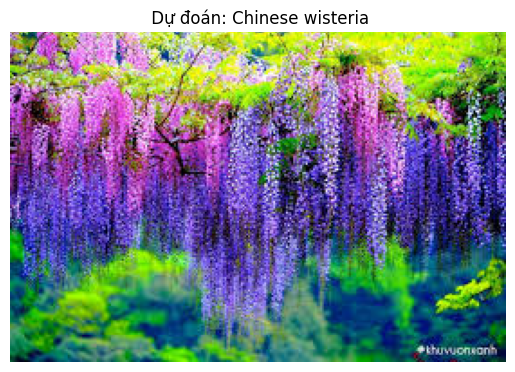

'Chinese wisteria'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os
from PIL import Image

# Cấu hình tăng dữ liệu
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Danh sách ảnh và nhãn tương ứng
image_paths = [
    ("/content/rose 1.jpg", 2),
    ("//content/Chinese wisteria.jpg", 4),
    ("/content/sunflower.jpg", 3),
    ("/content/daisy.jpg", 0),
    ("/content/dandelion.jpg", 1)
]

X_aug = []
Y_aug = []

# Mỗi ảnh gốc sẽ được tạo thành 20 ảnh mới
for img_path, label in image_paths:
    img = load_img(img_path, target_size=(32, 32))  # Load ảnh
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    i = 0
    for batch in datagen.flow(x, batch_size=1):
        aug_img = batch[0].astype('float32') / 255.0
        X_aug.append(aug_img)
        Y_aug.append(label)
        i += 1
        if i >= 20:  # Tạo 20 ảnh mới từ mỗi ảnh gốc
            break

X_aug = np.array(X_aug)
Y_aug = np.array(Y_aug)

# Chuyển ảnh về dạng vector 1 chiều để dùng ANN
X_aug_flattened = X_aug.reshape((X_aug.shape[0], 32 * 32 * 3))
Y_aug_encoded = to_categorical(Y_aug, num_classes=5)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Mô hình ANN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Huấn luyện
model.fit(X_aug_flattened, Y_aug_encoded, epochs=100, batch_size=16)
model.save("flower_model_ann_augmented.h5")
flower_names = ["daisy", "dandelion", "rose", "sunflower", "Chinese wisteria"]

def predict_flower(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x_input = np.array(img).astype('float32') / 255.0
    x_input = x_input.reshape(1, 32*32*3)

    prediction = model.predict(x_input)
    predicted_label = np.argmax(prediction)
    predicted_flower = flower_names[predicted_label]

    # Hiển thị ảnh và kết quả
    import cv2, matplotlib.pyplot as plt
    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f" Dự đoán: {predicted_flower}")
    plt.axis('off')
    plt.show()

    return predicted_flower
predict_flower("/content/chinese wisteria_test.jpg")

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2097 - loss: 2.1649
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4579 - loss: 1.5607
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6862 - loss: 0.8199
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8602 - loss: 0.3927
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8325 - loss: 0.5985
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9170 - loss: 0.1508
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9824 - loss: 0.0955
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9730 - loss: 0.0978
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0426
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9927 - loss: 0.0425
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0261
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


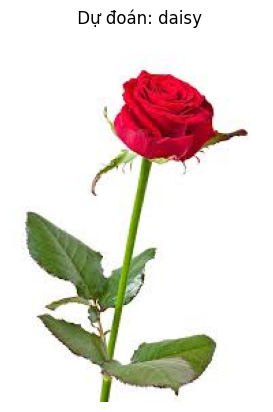

'daisy'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Tăng dữ liệu để tránh overfit
datagen = ImageDataGenerator(
    rotation_range=40,          # xoay ảnh ngẫu nhiên trong khoảng 40 độ
    width_shift_range=0.2,      # dịch ảnh theo chiều ngang
    height_shift_range=0.2,     # dịch ảnh theo chiều dọc
    shear_range=0.2,            # nghiêng ảnh
    zoom_range=0.2,             # phóng to/thu nhỏ
    horizontal_flip=True,       # lật ngang ảnh
    fill_mode='nearest'         # điền pixel sau khi biến đổi
)

# Danh sách ảnh gốc kèm nhãn
image_paths = [
    ("/content/flower/rose3.jpg", 2),
    ("/content/flower/wisteria1.jpg", 4),
    ("/content/flower/sunflower1.jpg", 3),
    ("/content/flower/daisy1.jpg", 0),
    ("/content/flower/dandelion1.jpg", 1)
]

X_aug = []
Y_aug = []

# Tạo mỗi ảnh gốc thành 20 ảnh mới bằng data augmentation
for img_path, label in image_paths:
    img = load_img(img_path, target_size=(32, 32))  # resize ảnh về 32x32
    x = img_to_array(img)                           # chuyển ảnh thành mảng số
    x = np.expand_dims(x, axis=0)                   # thêm 1 chiều cho đúng định dạng input

    count = 0
    for batch in datagen.flow(x, batch_size=1):
        aug_img = batch[0].astype('float32') / 255.0  # chuẩn hóa pixel
        X_aug.append(aug_img)
        Y_aug.append(label)
        count += 1
        if count >= 20:   # mỗi ảnh tạo ra 20 ảnh mới
            break

# Chuyển dữ liệu thành mảng numpy
X_aug = np.array(X_aug)
Y_aug = np.array(Y_aug)

# Ép ảnh 3D về dạng 1D để dùng cho ANN
X_aug_flat = X_aug.reshape((X_aug.shape[0], 32 * 32 * 3))

# One-hot encoding cho nhãn

Y_aug_oh = to_categorical(Y_aug, num_classes=5)

# Tạo model ANN đơn giản


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))  # input layer
model.add(Dropout(0.3))                                           # giảm overfit
model.add(Dense(256, activation='relu'))                          # hidden layer
model.add(Dense(128, activation='relu'))                          # hidden layer
model.add(Dense(5, activation='softmax'))                         # output: 5 loại hoa

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit(X_aug_flat, Y_aug_oh, epochs=100, batch_size=16)

# Lưu model
model.save("flower_model_ann_augmented.h5")

# Tên hoa tương ứng với label
flower_names = ["daisy", "dandelion", "rose", "sunflower", "Chinese wisteria"]

# Hàm dự đoán ảnh mới
def predict_flower(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')  # đọc và resize ảnh
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    flower = flower_names[label]

    # Hiển thị ảnh và tên hoa dự đoán
    import cv2
    import matplotlib.pyplot as plt
    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f" Dự đoán: {flower}")
    plt.axis('off')
    plt.show()

    return flower

# Thử nghiệm với ảnh mới
predict_flower("/content/flower/rose2.jpg")


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2582 - loss: 2.2564
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2455 - loss: 2.3116
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3814 - loss: 1.6856
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4727 - loss: 1.2169
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5835 - loss: 1.0751
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5535 - loss: 0.9312
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6941 - loss: 0.6790
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8109 - loss: 0.5017
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9283 - loss: 0.2976
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9662 - loss: 0.2775
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9564 - loss: 0.2196
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9184 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


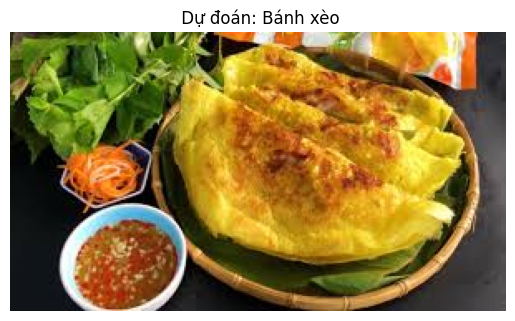

'Bánh xèo'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Tăng dữ liệu để tránh overfitting
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Danh sách ảnh món ăn gốc và label tương ứng
image_paths = [
    ("/content/mon an /pho bo .jpg", 0),
    ("/content/mon an /bun bo .jpg", 1),
    ("/content/mon an /com suon.jpg", 2),
    ("/content/mon an /banh xeo.jpg", 3),
    ("/content/mon an /banh mi.jpg", 4)
]

X_aug = []
Y_aug = []

# Tăng dữ liệu từ ảnh gốc
for img_path, label in image_paths:
    img = load_img(img_path, target_size=(32, 32))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    count = 0
    for batch in datagen.flow(x, batch_size=1):
        aug_img = batch[0].astype('float32') / 255.0
        X_aug.append(aug_img)
        Y_aug.append(label)
        count += 1
        if count >= 20:
            break

X_aug = np.array(X_aug)
Y_aug = np.array(Y_aug)

# Flatten ảnh để dùng ANN
X_aug_flat = X_aug.reshape((X_aug.shape[0], 32 * 32 * 3))
Y_aug_oh = to_categorical(Y_aug, num_classes=5)

# Xây dựng mô hình ANN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Huấn luyện mô hình
model.fit(X_aug_flat, Y_aug_oh, epochs=100, batch_size=16)

# Lưu mô hình
model.save("vietnamese_food_ann_model.h5")

# Tên món ăn tương ứng label
food_names = ["Phở bò", "Bún bò", "Cơm sườn", "Bánh xèo", "Bánh mì"]

# Hàm dự đoán món ăn từ ảnh mới
def predict_food(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    food = food_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f" Dự đoán: {food}")
    plt.axis('off')
    plt.show()

    return food

# Ví dụ sử dụng với ảnh mới
predict_food("/content/mon an /banh xeo_test.jpg")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,804,422 (14.51 MB)

 Trainable params: 3,804,422 (14.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6077 - loss: 1.0960 - val_accuracy: 0.1667 - val_loss: 23.4335
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9720 - loss: 0.0727 - val_accuracy: 0.1667 - val_loss: 34.5666
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9963 - loss: 0.0257 - val_accuracy: 0.1667 - val_loss: 37.5998
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9978 - loss: 0.0058 - val_accuracy: 0.1667 - val_loss: 43.3987
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9794 - loss: 0.0678 - val_accuracy: 0.1667 - val_loss: 36.2740
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 1.0000 - loss: 2.4744e-05 - val_accuracy: 0.1333 - val_loss: 33.5284
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9692 - loss: 0.2563 - val_accuracy: 0.1667 - val_loss: 44.6688
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 7.8822e-04 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


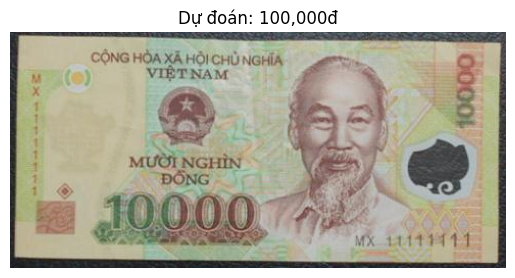

'100,000đ'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import joblib
import os

# Tăng dữ liệu
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Danh sách ảnh gốc và nhãn
image_paths = [
    ("/content/tien vn/10k 1jpg.jpg", 0),
    ("/content/tien vn/20k.jpg", 1),
    ("/content/tien vn/50k.jpg", 2),
    ("/content/tien vn/100k.jpg", 3),
    ("/content/tien vn/200k.jpg", 4),
    ("/content/tien vn/500k.jpg", 5)
]

X_aug = []
Y_aug = []

# Tăng cường dữ liệu
for img_path, label in image_paths:
    img = load_img(img_path, target_size=(32, 32))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    count = 0
    for batch in datagen.flow(x, batch_size=1):
        aug_img = batch[0].astype('float32') / 255.0
        X_aug.append(aug_img)
        Y_aug.append(label)
        count += 1
        if count >= 50:  # Tăng từ 20 lên 50 ảnh mỗi loại
            break

X_aug = np.array(X_aug)
Y_aug = np.array(Y_aug)

# Ép ảnh thành vector 1 chiều
X_aug_flat = X_aug.reshape((X_aug.shape[0], 32 * 32 * 3))

# Chuẩn hóa bằng StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aug_flat)
joblib.dump(scaler, 'scaler.save')  # Lưu scaler để dùng lúc dự đoán

# One-hot encoding nhãn
Y_aug_oh = to_categorical(Y_aug, num_classes=6)

# Mô hình ANN cải tiến
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile và train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_scaled, Y_aug_oh, epochs=150, batch_size=16, validation_split=0.2)

# Lưu model
model.save("vietnamese_currency_ann_model.h5")

# Tên các loại tiền tương ứng
money_names = ["10,000đ", "20,000đ", "50,000đ", "100,000đ", "200,000đ", "500,000đ"]

# Hàm dự đoán
def predict_money(image_path):
    scaler = joblib.load('scaler.save')  # Tải lại scaler đã lưu
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)
    x_scaled = scaler.transform(x)

    pred = model.predict(x_scaled)
    label = np.argmax(pred)
    money = money_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {money}")
    plt.axis('off')
    plt.show()

    return money

# Ví dụ test
predict_money("/content/tien vn/10k_test1.jpg")


Bỏ qua ảnh lỗi: /content/faces/son_tung/.ipynb_checkpoints


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.2495 - loss: 1.8834
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4543 - loss: 1.2986
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4056 - loss: 1.3122
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4822 - loss: 1.1999
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5525 - loss: 0.9937
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6157 - loss: 0.9118
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5966 - loss: 0.8480
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6357 - loss: 0.7716
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6053 - loss: 0.8024
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6642 - loss: 0.6969
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6217 - loss: 0.7308
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6386 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


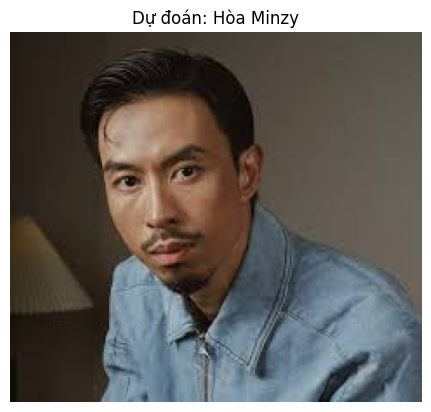

'Hòa Minzy'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

# Tăng dữ liệu để tránh overfitting
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Map tên thư mục thành label
label_map = {
    "nhan": 0,
    "son_tung": 1,
    "tran_thanh": 2,
    "hoa_minzy": 3,
    "gducky": 4
}
face_names = ["Trúc Nhân", "Sơn Tùng", "Trấn Thành", "Hòa Minzy", "Gducky"]

# Đọc ảnh và tăng dữ liệu
data_dir = "/content/faces"
X_aug = []
Y_aug = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = load_img(img_path, target_size=(32, 32))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            count = 0
            for batch in datagen.flow(x, batch_size=1):
                aug_img = batch[0].astype('float32') / 255.0
                X_aug.append(aug_img)
                Y_aug.append(label)
                count += 1
                if count >= 10:  # tăng 10 ảnh từ mỗi ảnh gốc
                    break
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

# Xử lý dữ liệu
X_aug = np.array(X_aug)
Y_aug = np.array(Y_aug)
X_aug_flat = X_aug.reshape((X_aug.shape[0], 32 * 32 * 3))
Y_aug_oh = to_categorical(Y_aug, num_classes=5)

# Xây dựng mô hình ANN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile và huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_aug_flat, Y_aug_oh, epochs=100, batch_size=16)

# Lưu mô hình
model.save("face_recognition_ann_model.h5")

# Hàm dự đoán khuôn mặt mới
def predict_face(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    person = face_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {person}")
    plt.axis('off')
    plt.show()

    return person

# Ví dụ sử dụng:
predict_face("/content/hinh test/den vau test1.jpg")


Bỏ qua ảnh lỗi: /content/faces/son_tung/.ipynb_checkpoints


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3792 - loss: 1.8046
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2167 - loss: 1.9521
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4125 - loss: 1.4474
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2833 - loss: 1.7835
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3708 - loss: 1.5396
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3917 - loss: 1.6236 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5750 - loss: 1.1550
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 1.8559 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5000 - loss: 1.5732
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4125 - loss: 1.7053
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4125 - loss: 1.8267
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6083 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


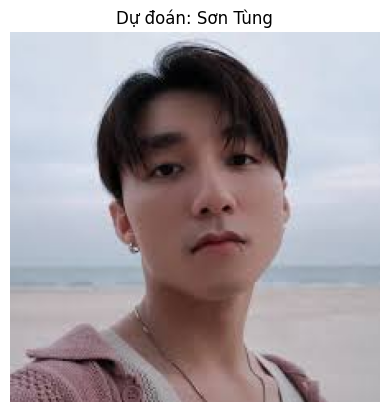

'Sơn Tùng'

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

# Map tên thư mục thành label
label_map = {
    "truc_nhan": 0,
    "son_tung": 1,
    "tran_thanh": 2,
    "hoa_minzy": 3,
    "den_vau": 4
}
face_names = [" Trúc Nhân", "Sơn Tùng", "Trấn Thành", "Hòa Minzy", "Đen Vâu"]

# Đọc ảnh gốc và gán label
data_dir = "/content/faces"
X = []
Y = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(img_path).resize((32, 32)).convert('RGB')
            x = np.array(img).astype('float32') / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

# Chuyển dữ liệu thành numpy array
X = np.array(X)
Y = np.array(Y)

# Ép ảnh về 1D và one-hot encode nhãn
X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=5)

# Mô hình ANN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile và train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=100, batch_size=16)

# Lưu mô hình
model.save("face_recognition_ann_model.h5")

# Hàm dự đoán khuôn mặt mới
def predict_face(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    person = face_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {person}")
    plt.axis('off')
    plt.show()

    return person

# Ví dụ:
predict_face("/content/hinh test/song tung test2.jpg")


Bỏ qua ảnh lỗi: /content/mon an /banh_mi/bun_bo
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/.ipynb_checkpoints
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/banh_mi
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/pho_bo
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/goi_cuon
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/banh_xeo


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.0526 - loss: 1.9436
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2629 - loss: 1.7813
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1895 - loss: 1.7776
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2738 - loss: 1.9150
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5367 - loss: 1.5204
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3056 - loss: 1.7279
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5893 - loss: 1.2092
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4315 - loss: 1.3963
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4841 - loss: 1.0648 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5893 - loss: 1.1411
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4841 - loss: 1.3077
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4841 - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


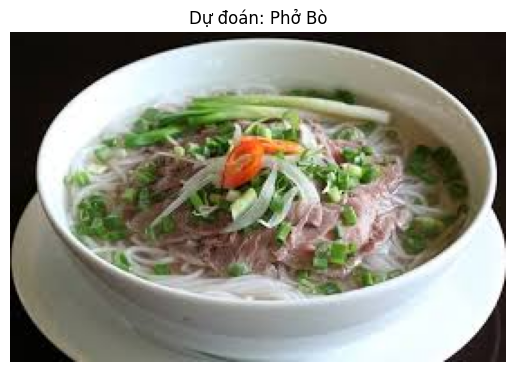

'Phở Bò'

In [35]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

# Map tên thư mục thành label
label_map = {
    "banh_mi": 0,
    "banh_xeo": 1,
    "bun_bo": 2,
    "goi_cuon": 3,
    "pho_bo": 4
}
face_names = ["Bánh Mì", "Bánh Xèo", "Bún Bò", "Gỏi Cuốn", "Phở Bò"]

# Đọc ảnh gốc và gán label
data_dir = "/content/mon an "
X = []
Y = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(img_path).resize((32, 32)).convert('RGB')
            x = np.array(img).astype('float32') / 255.0
            X.append(x)
            Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

# Chuyển dữ liệu thành numpy array
X = np.array(X)
Y = np.array(Y)

# Ép ảnh về 1D và one-hot encode nhãn
X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=5)

# Mô hình ANN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile và train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=100, batch_size=16)

# Lưu mô hình
model.save("face_recognition_ann_model.h5")

# Hàm dự đoán khuôn mặt mới
def predict_face(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    person = face_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {person}")
    plt.axis('off')
    plt.show()

    return person

# Ví dụ:
predict_face("/content/hinh test/pho bo test1.jpg")

Bỏ qua ảnh lỗi: /content/mon an /banh_mi/bun_bo
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/.ipynb_checkpoints
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/banh_mi
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/pho_bo
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/goi_cuon
Bỏ qua ảnh lỗi: /content/mon an /banh_mi/banh_xeo


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150


Exception ignored in: <function _xla_gc_callback at 0x7d53227b5300>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.2468 - loss: 1.9260
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7565 - loss: 0.5794
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8771 - loss: 0.2769
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9465 - loss: 0.1279
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9637 - loss: 0.1172
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9741 - loss: 0.1078
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9843 - loss: 0.0737
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9948 - loss: 0.0189
Epoch 9/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9785 - loss: 0.0398
Epoch 10/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 11/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9963 - loss: 0.0198
Epoch 12/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0023


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


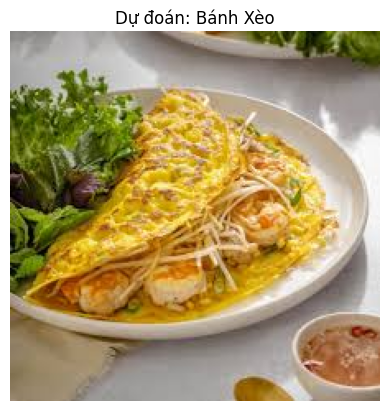

'Bánh Xèo'

In [44]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

# Map tên thư mục thành label
label_map = {
    "banh_mi": 0,
    "banh_xeo": 1,
    "bun_bo": 2,
    "goi_cuon": 3,
    "pho_bo": 4
}
face_names = ["Bánh Mì", "Bánh Xèo", "Bún Bò", "Gỏi Cuốn", "Phở Bò"]

# Hàm tiền xử lý ảnh: resize + chuẩn hóa Z-score
def preprocess_image(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')
    img = np.array(img).astype('float32') / 255.0
    img = (img - np.mean(img)) / (np.std(img) + 1e-7)
    return img

# Hàm augmentation thủ công
def augment_image(image):
    images = [image]
    images.append(np.fliplr(image))  # lật ngang
    images.append(np.flipud(image))  # lật dọc
    images.append(np.rot90(image, k=1))  # xoay 90 độ
    images.append(np.rot90(image, k=2))  # xoay 180 độ
    return images

# Đọc ảnh và tăng dữ liệu
data_dir = "/content/mon an "
X = []
Y = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path) or folder_name not in label_map:
        continue
    label = label_map[folder_name]

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = preprocess_image(img_path)
            augmented = augment_image(img)
            for aug in augmented:
                X.append(aug)
                Y.append(label)
        except:
            print(f"Bỏ qua ảnh lỗi: {img_path}")

# Chuyển dữ liệu thành numpy array
X = np.array(X)
Y = np.array(Y)

# Ép ảnh về 1D và one-hot encode nhãn
X_flat = X.reshape((X.shape[0], 32 * 32 * 3))
Y_oh = to_categorical(Y, num_classes=5)

# Mô hình ANN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Compile và train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_flat, Y_oh, epochs=150, batch_size=16)

# Lưu mô hình
model.save("food_recognition_ann_model.h5")

# Hàm dự đoán món ăn
def predict_face(image_path):
    img = preprocess_image(image_path)
    x = img.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    person = face_names[label]

    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f"Dự đoán: {person}")
    plt.axis('off')
    plt.show()

    return person

# Ví dụ:
predict_face("/content/hinh test/banh xeo test1.jpg")
